In [111]:
import pandas as pd  
import numpy as np  
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [120]:
#creating multilinear regression model, phew uh oh
df = pd.read_csv('C:\\Users\\rutme\\Documents\\GitHub\\nowaste-project\\static\\csv\\allfinaldata.csv')
df['Median Household Income'] = df['Median Household Income'].astype(float)
df

,Borough ID,District Number,Food waste in tons,Population,Food Waste per person,Food waste per person in pounds,Median Household Income,Populationaged65,PercentagePopulationaged65,Populationaged25withabachelorsdegreeorhigher,...,Unemployment rate,PercentageUnemployment,RacialDiversityIndex,Poverty Rate,PercentagePoverty,Householdswithchildrenunder18yearsold,Poverty Rate.1,PercentagePoverty.1,Householdswithchildrenunder18yearsold.1,PercentageHouseholdswithchildrenunder18yearsold
0,1,1,173.8,151979,0.001144,2.287158,150600.79790,0.138545,13.85450,0.831329,...,0.036574,3.65743,0.445724,0.066248,6.62483,0.169700,0.066248,6.62483,0.169700,16.9700
1,1,4,280.8,165452,0.001697,3.394338,102750.74690,0.140820,14.08200,0.733121,...,0.053144,5.31443,0.584941,0.111038,11.10380,0.114626,0.111038,11.10380,0.114626,11.4626
2,1,6,330.7,143582,0.002303,4.606427,137127.72310,0.193959,19.39590,0.818122,...,0.027413,2.74129,0.497315,0.078742,7.87418,0.101177,0.078742,7.87418,0.101177,10.1177
3,1,7,288.9,191222,0.001511,3.021619,123835.59050,0.220393,22.03930,0.786002,...,0.050923,5.09233,0.499047,0.084594,8.45944,0.201193,0.084594,8.45944,0.201193,20.1193
4,1,8,218.3,204469,0.001068,2.135287,123709.54090,0.214879,21.48790,0.792073,...,0.027460,2.74598,0.406150,0.054430,5.44296,0.159944,0.054430,5.44296,0.159944,15.9944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,4,5,1462.7,186458,0.007845,15.689324,66503.22852,0.111913,11.19130,0.269208,...,0.093946,9.39461,0.575231,0.122963,12.29630,0.372745,NaN,NaN,NaN,NaN
69,5,1,1353.2,170280,0.007947,15.893822,59660.10246,0.124747,12.47470,0.315325,...,0.105494,10.54940,0.725959,0.218464,21.84640,0.383977,NaN,NaN,NaN,NaN
70,2,10,407.6,121209,0.003363,6.725573,58749.75894,0.198013,19.80130,0.271717,...,0.043968,4.39678,0.690088,0.109928,10.99280,0.310499,NaN,NaN,NaN,NaN
71,3,7,972.2,152685,0.006367,12.734715,51362.48074,0.075161,7.51613,0.265287,...,0.070386,7.03862,0.669526,0.275736,27.57360,0.411621,NaN,NaN,NaN,NaN


In [ ]:
dfcorr = pd.read_csv('C:\\Users\\rutme\\Documents\\GitHub\\nowaste-project\\static\\csv\\allfinaldata.csv')
dfcorr = dfcorr.drop(columns=["Borough ID","District Number", "Food Waste per person", "PercentagePopulationaged65", "PercentagePopulationaged25withabachelorsdegreeorhigher","PercentagePopulationaged25withouthighschooldiploma", "PercentageUnemployment", "Poverty Rate.1", "PercentagePoverty.1", "Householdswithchildrenunder18yearsold.1", "PercentageHouseholdswithchildrenunder18yearsold"])
dfcorr


In [ ]:
corrmatrix = dfcorr.corr()
print(corrmatrix)

In [ ]:
seabornInstance.heatmap(corrmatrix, annot=True)
plt.show()

In [ ]:
covMatrix = pd.DataFrame.cov(dfcorr)
print (covMatrix)

In [ ]:
seabornInstance.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [121]:
#multilinear regression = mlr
y = df['Food waste per person in pounds']
x = df[['Income Diversity Index', 'RacialDiversityIndex', 'Poverty Rate', 'Populationaged25withabachelorsdegreeorhigher']]


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression(n_jobs=-1)  
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])  
coeff_df


,Coefficient
Income Diversity Index,-2.382458
RacialDiversityIndex,28.424461
Poverty Rate,-63.049140
Populationaged25withabachelorsdegreeorhigher,-19.427924


In [123]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1


,Actual,Predicted
49,1.863931,1.164020
53,8.936472,25.768794
22,5.764444,5.315315
43,25.638119,18.230149
28,14.746737,31.479314
26,13.775172,22.364727
70,6.725573,26.189858
50,0.746105,9.665174
34,2.671139,9.323428
7,1.884716,6.577120


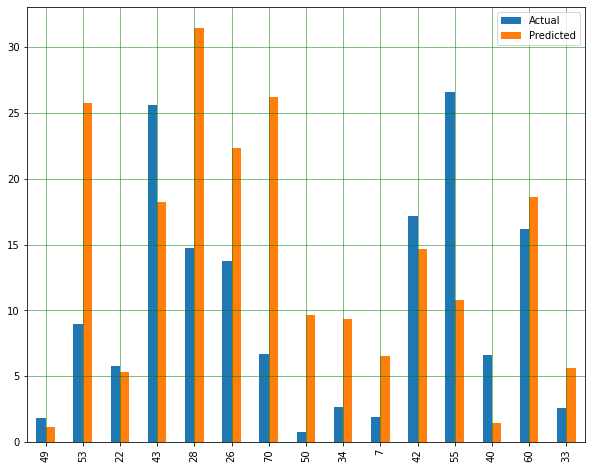

In [124]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [125]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.953440026124162
Mean Squared Error: 100.95887824432222
Root Mean Squared Error: 10.04782952902378
